# Binning in Python Pandas

It is a method of data pre-processing.
Binning is when you group values together into bins. 

For example:

You can bin “age” into [0 to 5] , [6 to 10] ,  [11 to 15] 

Can bin "distance" into ["larger", "short", "medium"]

Can bin "price" into ["high", "medium", "low"]

and so on.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dict_purchases_profile = {'annual spend': [1000, 100, 150, 400, 80, 500, 450, 120, 450], 
                          'age':[20,13,35,60,40,42,65,18,15], 
                          'distance_to_store_Km':[20, 4, 1, 3, 5, 10, 2,1,1], 
                          'onsite':[1,2,5,20,5,15,2,1,5],
                          'online':[50,20,30,1,4,5,20,5,25]}

df_purchases_profile = pd.DataFrame.from_dict(dict_purchases_profile)

df_purchases_profile

,annual spend,age,distance_to_store_Km,onsite,online
0,1000,20,20,1,50
1,100,13,4,2,20
2,150,35,1,5,30
3,400,60,3,20,1
4,80,40,5,5,4
5,500,42,10,15,5
6,450,65,2,2,20
7,120,18,1,1,5
8,450,15,1,5,25


## Importante methods to do that


* The linspace function (Numpy): It creates a sequence of numbers evenly spaced between the given limits, optionally including the final value (by default, this is the behavior). This function will return a one-dimensional arrangement that can be used in any operation that requires arrangements.

* The cut function (Pandas): Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. 

## Bins to 'age'

In [38]:
#Use the method linspace 
bins_age = np.linspace( min(df_purchases_profile['age']) , max(df_purchases_profile['age']) , 4)

#See the result 
bins_age

array([13.        , 30.33333333, 47.66666667, 65.        ])

In [39]:
#Create of labels
group_labels = ['Young', 'Middle-age', 'Elderly']

#Using pd.cut to apply 
df_purchases_profile['age_binned'] = pd.cut(df_purchases_profile['age'], bins_age, labels=group_labels, include_lowest=True)

In [40]:
#See the result
df_purchases_profile

,annual spend,age,distance_to_store_Km,onsite,online,age_binned
0,1000,20,20,1,50,Young
1,100,13,4,2,20,Young
2,150,35,1,5,30,Middle-age
3,400,60,3,20,1,Elderly
4,80,40,5,5,4,Middle-age
5,500,42,10,15,5,Middle-age
6,450,65,2,2,20,Elderly
7,120,18,1,1,5,Young
8,450,15,1,5,25,Young


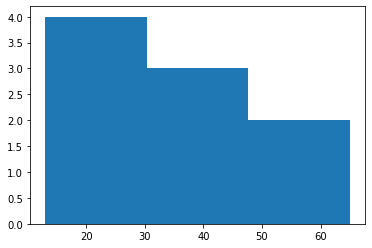

In [41]:
# The histogram graph could either demonstrate de distribuition of age
#Notice that from 0 to 30 there are 4 people, and so on.

plt.hist(df_purchases_profile['age'], bins=3)
plt.show()

## Bins to 'anual spend'

In [42]:
bins_spend = np.linspace(min(df_purchases_profile['annual spend']) , max(df_purchases_profile['annual spend']), 4)

bins_spend

array([  80.        ,  386.66666667,  693.33333333, 1000.        ])

In [43]:
labels_spend = ['low', 'medium', 'high']

df_purchases_profile['annual spend binned'] = pd.cut(df_purchases_profile['annual spend'], bins_spend, labels=labels_spend, include_lowest=True)

In [44]:
df_purchases_profile

,annual spend,age,distance_to_store_Km,onsite,online,age_binned,annual spend binned
0,1000,20,20,1,50,Young,high
1,100,13,4,2,20,Young,low
2,150,35,1,5,30,Middle-age,low
3,400,60,3,20,1,Elderly,medium
4,80,40,5,5,4,Middle-age,low
5,500,42,10,15,5,Middle-age,medium
6,450,65,2,2,20,Elderly,medium
7,120,18,1,1,5,Young,low
8,450,15,1,5,25,Young,medium


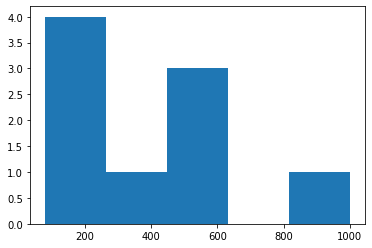

In [47]:
# The histogram graph could either demonstrate the distribution of 'annual spend'
# Notice that the concentration of spend is until $ 200 annual

plt.hist(df_purchases_profile['annual spend'], bins=5)
plt.show()